<a href="https://colab.research.google.com/github/MohammedAliBelay/coal-nalaysis/blob/MLR/coal_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cleaned column names: Index(['sample_id', 'moisture__pct', 'volatile_mater__pct', 'fixed_carbon_pct',
       'ash_pct', 'measured_hcv_(mj/kg)'],
      dtype='object')
Regression Equation:
Calorific Value = -12.73 +0.05*Ash +0.53*Volatile Matter +0.23*Fixed Carbon +0.11*Moisture
R² = 0.913
RMSE = 1.348, MAE = 0.886


/tmp/ipython-input-2659950995.py:61: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(y, p(y), 'k-', lw=2, label=f'Fitted trend', color='green')


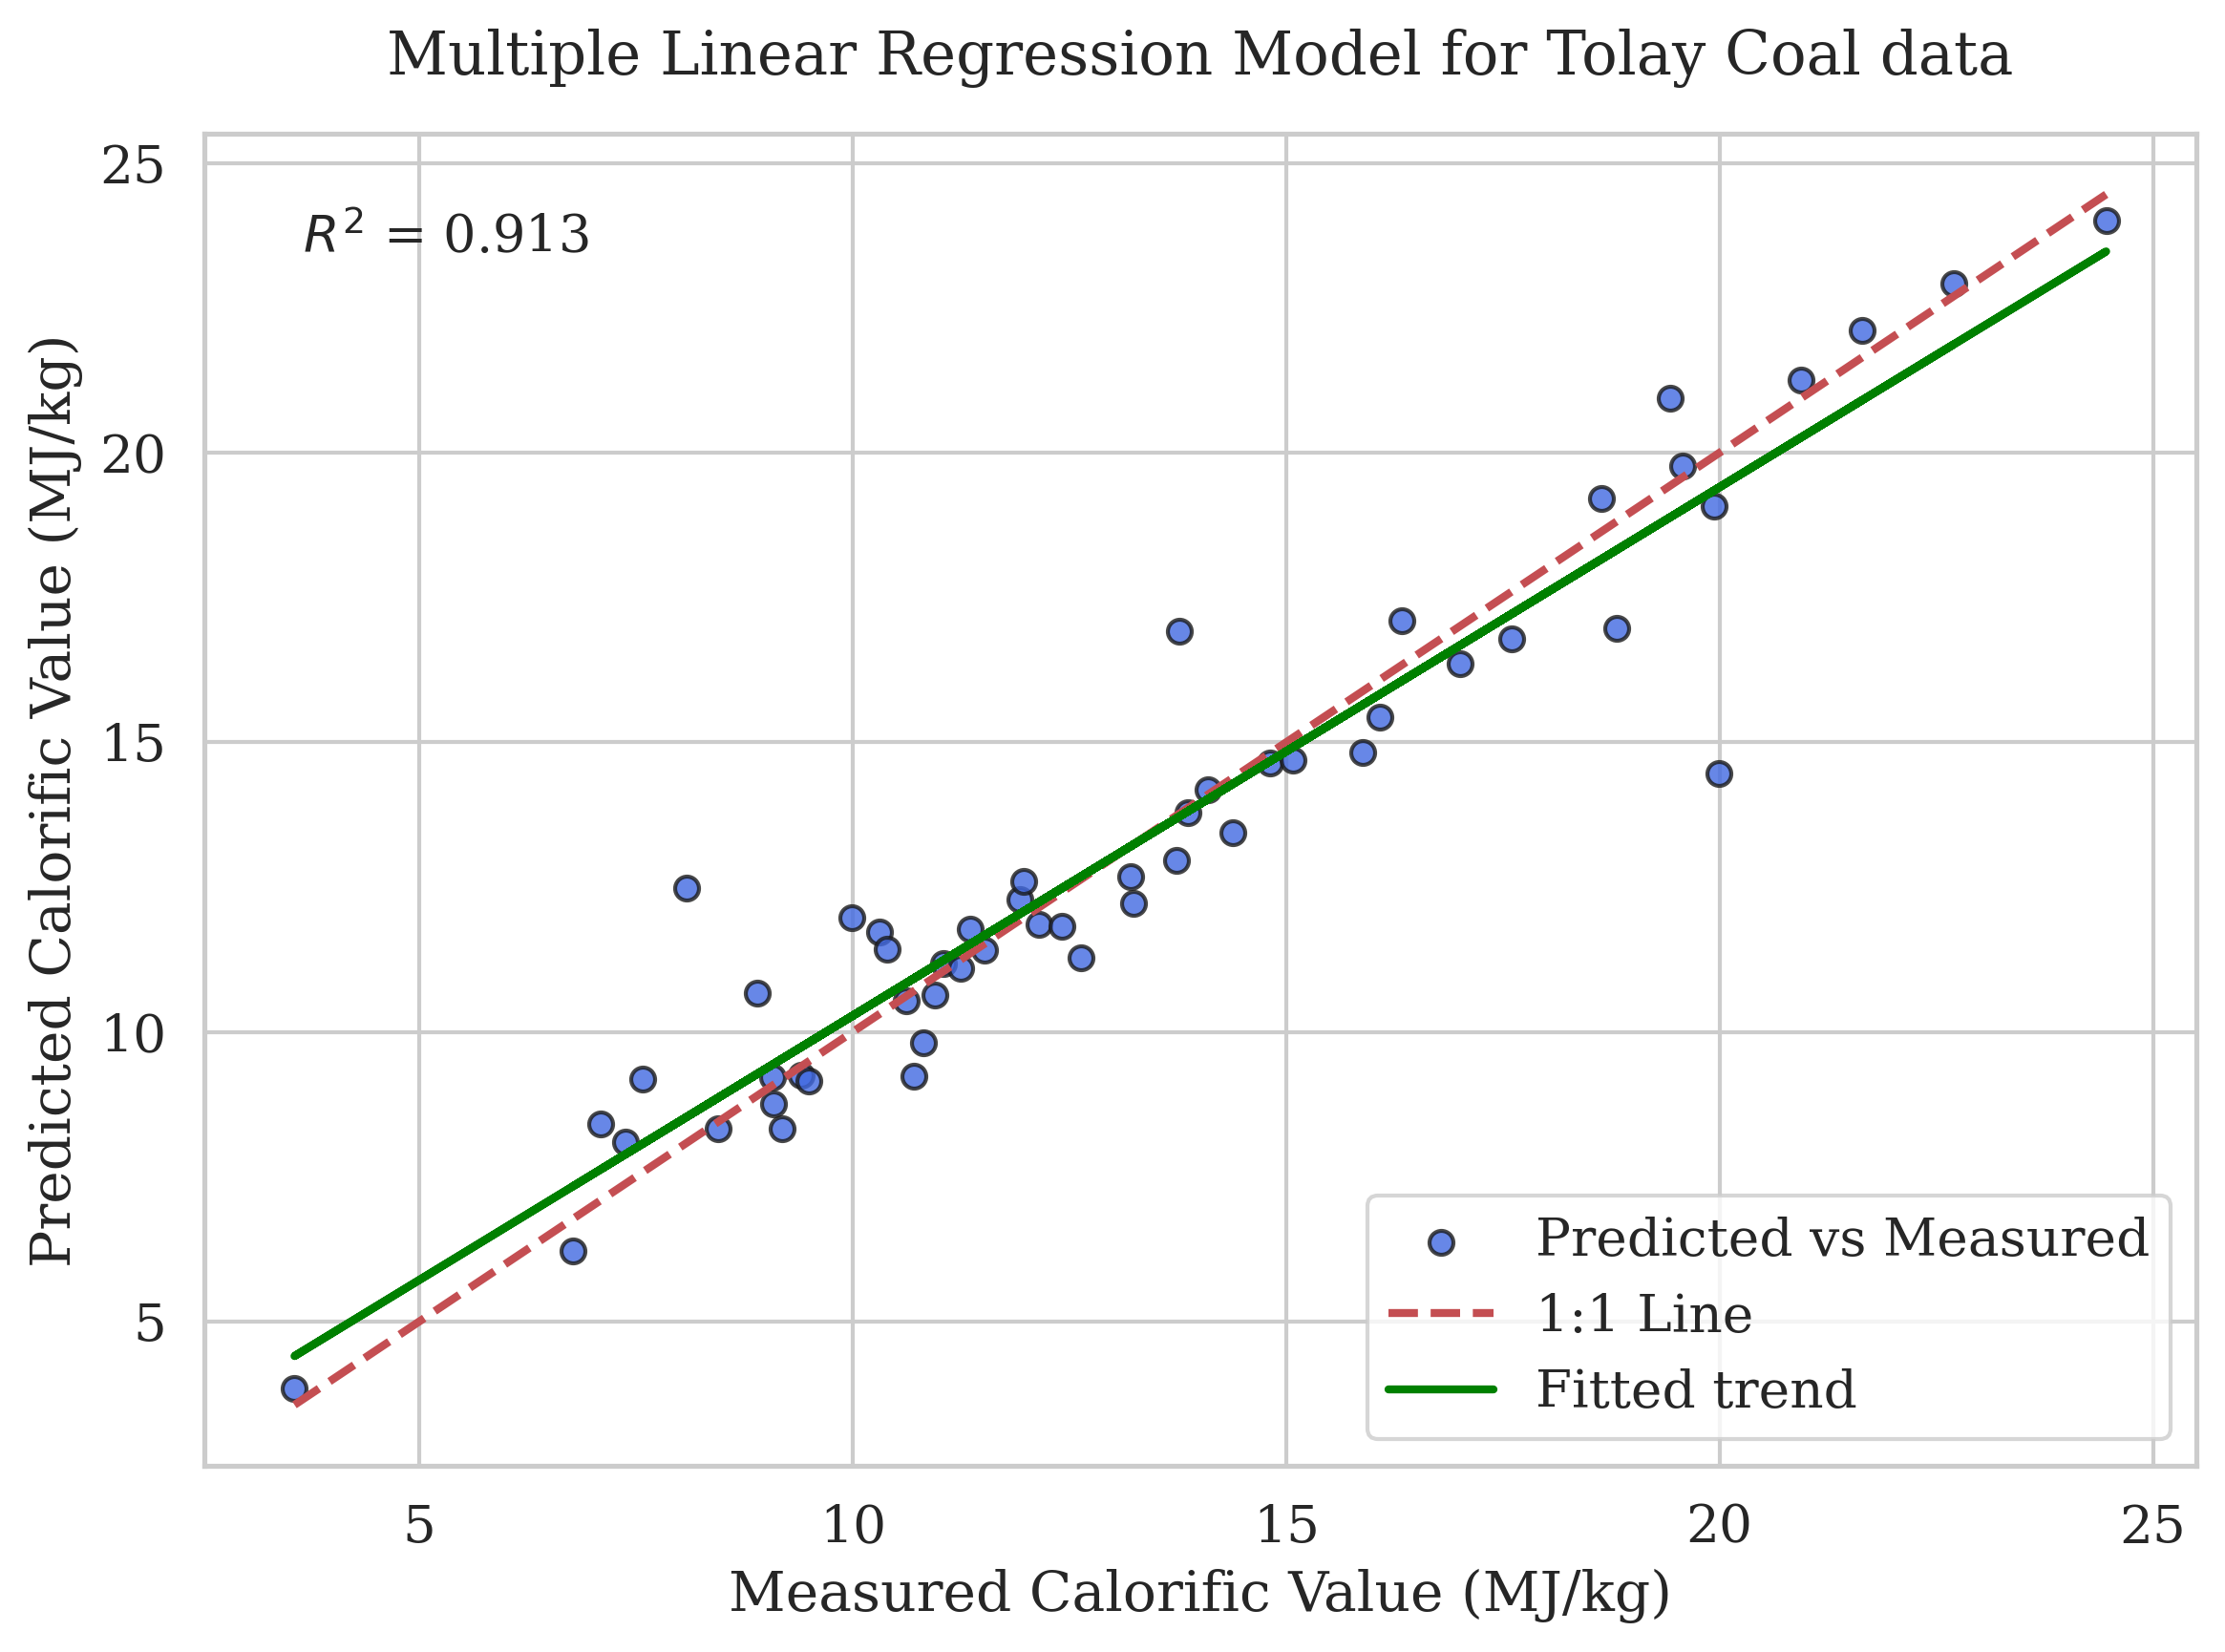

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# === Load dataset ===
data = pd.read_csv("/content/for regression.csv")

# === Clean column names ===
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('%', 'pct') # Added missing quote

# Print cleaned column names to verify
print("Cleaned column names:", data.columns)

# === Define variables ===
X = data[['ash_pct', 'volatile_mater__pct', 'fixed_carbon_pct', 'moisture__pct']]
y = data['measured_hcv_(mj/kg)'] # Corrected column name based on printed output

# === Fit Multiple Linear Regression ===
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# === Model coefficients ===
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
})
intercept = model.intercept_
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)


print("Regression Equation:")
print(f"Calorific Value = {intercept:.2f} "
      f"{model.coef_[0]:+.2f}*Ash "
      f"{model.coef_[1]:+.2f}*Volatile Matter "
      f"{model.coef_[2]:+.2f}*Fixed Carbon "
      f"{model.coef_[3]:+.2f}*Moisture")
print(f"R² = {r2:.3f}")
print(f"RMSE = {rmse:.3f}, MAE = {mae:.3f}")


# === Q1 Journal Graph ===
plt.figure(figsize=(8, 6), dpi=300)
sns.set_theme(style="whitegrid", font_scale=1.2, rc={"font.family": "serif", "axes.labelsize": 14})

# Scatter actual vs predicted
plt.scatter(y, y_pred, color='royalblue', alpha=0.8, edgecolor='k', label='Predicted vs Measured')

# 1:1 reference line
min_val, max_val = min(y.min(), y_pred.min()), max(y.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='1:1 Line')

# Fitted regression line
z = np.polyfit(y, y_pred, 1)
p = np.poly1d(z)
plt.plot(y, p(y), 'k-', lw=2, label=f'Fitted trend', color='green')

# Labels and aesthetics
plt.xlabel("Measured Calorific Value (MJ/kg)")
plt.ylabel("Predicted Calorific Value (MJ/kg)")
plt.title("Multiple Linear Regression Model for Tolay Coal data", fontsize=15, pad=15)
plt.legend()
plt.text(min_val + 0.1, max_val - 1, f"$R^2$ = {r2:.3f}", fontsize=13)

plt.tight_layout()
plt.show()

Index(['sample_id', 'moisture__pct', 'volatile_mater__pct', 'fixed_carbon_pct',
       'ash_pct', 'measured_hcv_(mj/kg)'],
      dtype='object')


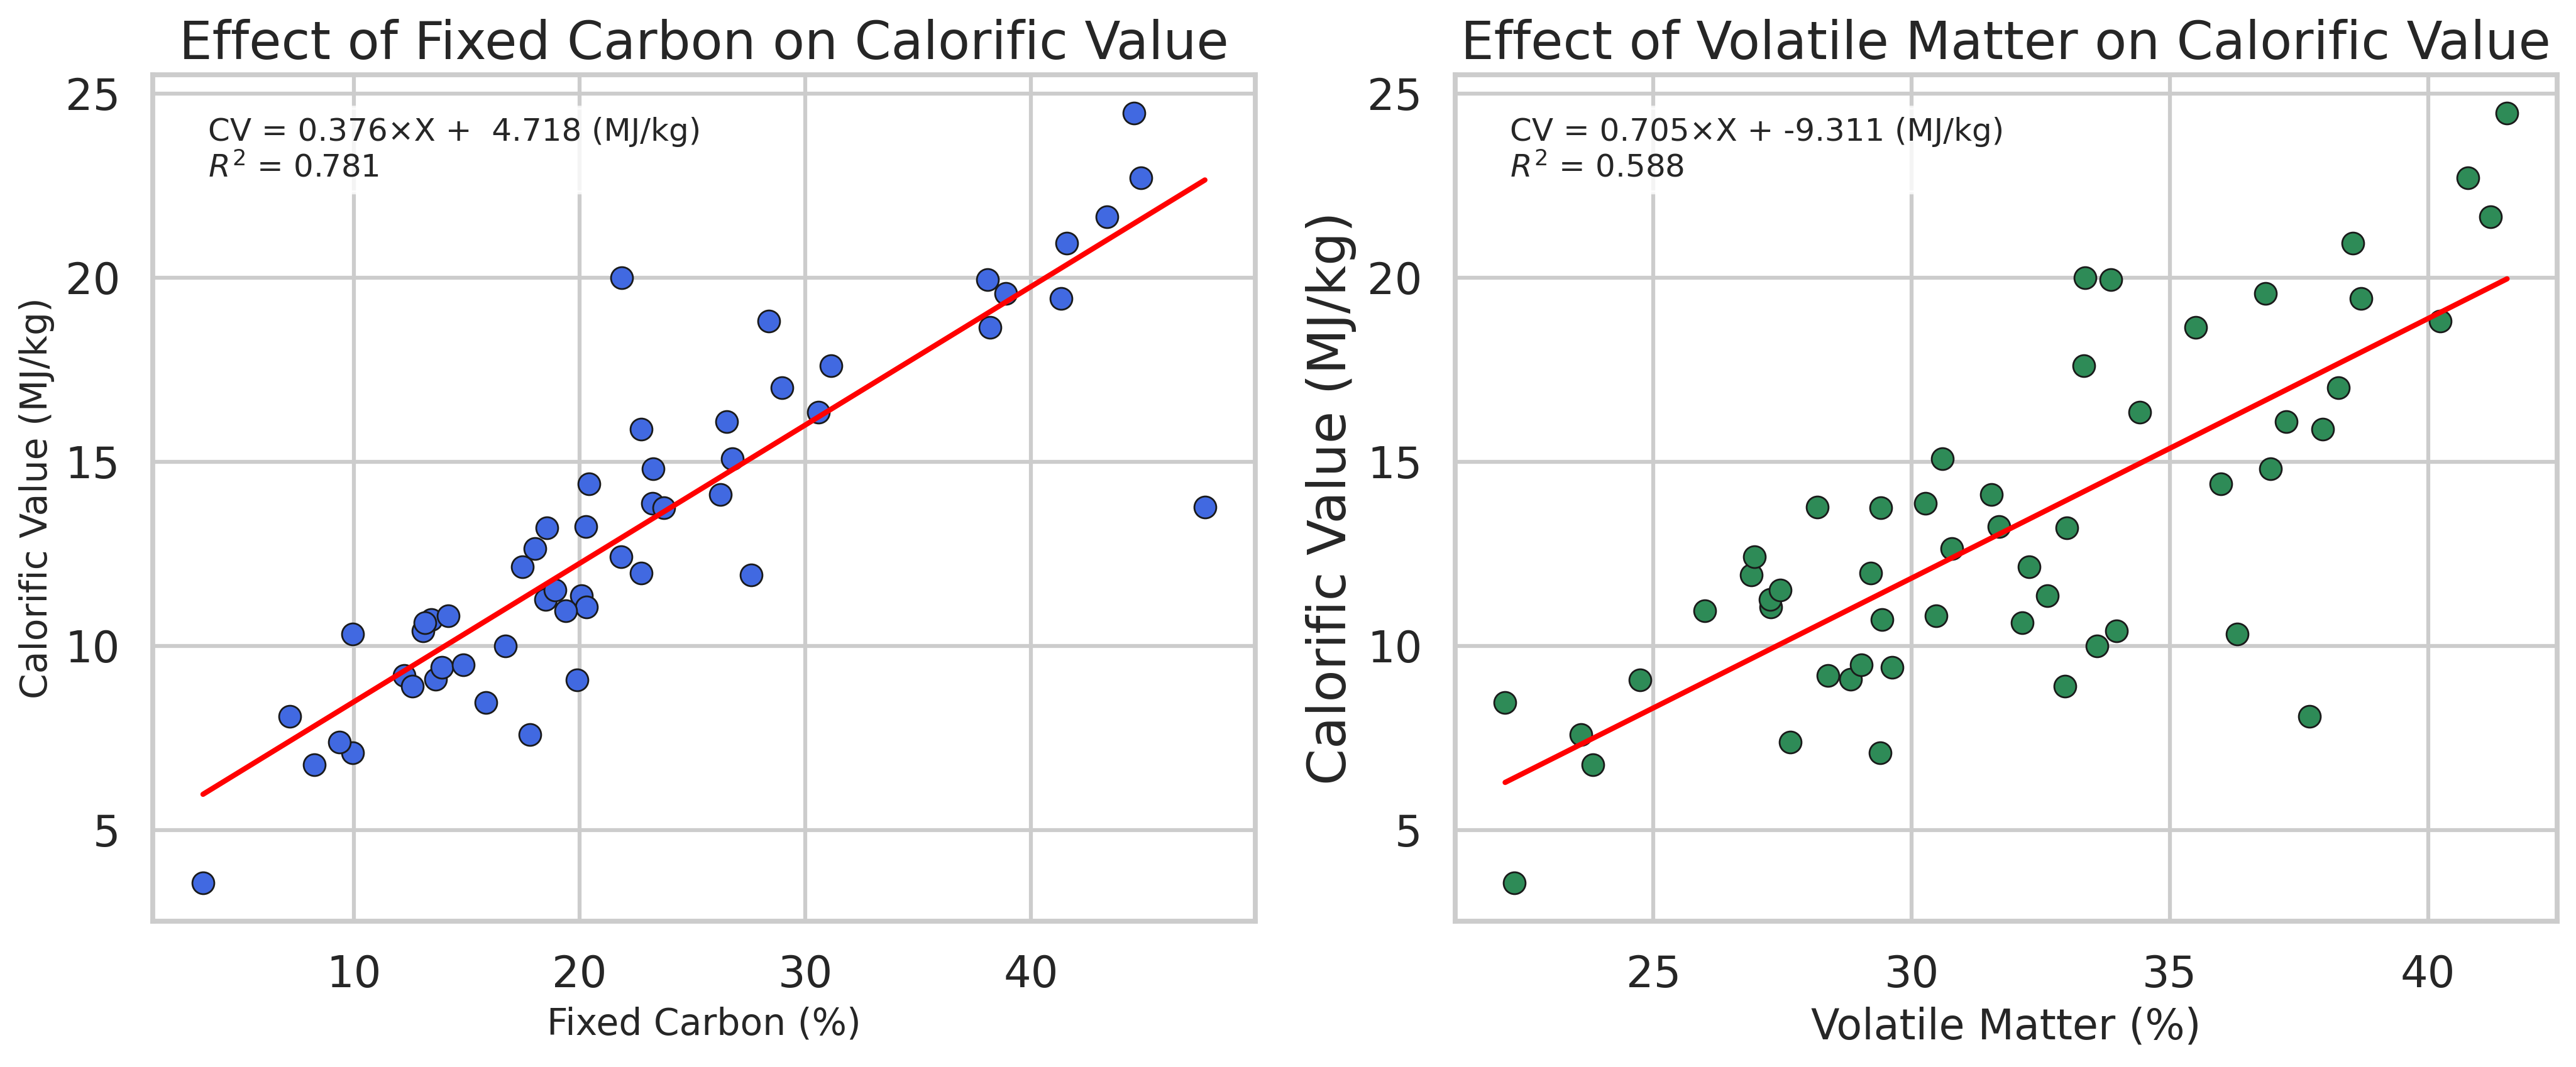

In [ ]:
# ============================================================
# Visualization: Effect of Fixed Carbon and Volatile Matter on Calorific Value
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# ------------------------------------------------------------
# 1. Load dataset
# ------------------------------------------------------------
data = pd.read_csv("for regression.csv")

# Clean column names to match previous cells
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('%', 'pct')


# Inspect column names after cleaning
print(data.columns)

# ------------------------------------------------------------
# 2. Define helper function for regression info
# ------------------------------------------------------------
def regression_line(x, y):
    x = np.array(x).reshape(-1, 1)
    y = np.array(y)
    model = LinearRegression().fit(x, y)
    y_pred = model.predict(x)
    r2 = r2_score(y, y_pred)
    # Correct the unit in the equation
    eq = f"CV = {model.coef_[0]:.3f}×X + {model.intercept_: .3f} (MJ/kg)"
    return y_pred, r2, eq

# ------------------------------------------------------------
# 3. Regression for Fixed Carbon vs CV
# ------------------------------------------------------------
# Corrected column name
y_pred_fc, r2_fc, eq_fc = regression_line(data["fixed_carbon_pct"], data["measured_hcv_(mj/kg)"])

# ------------------------------------------------------------
# 4. Regression for Volatile Matter vs CV
# ------------------------------------------------------------
# Corrected column name
y_pred_vm, r2_vm, eq_vm = regression_line(data["volatile_mater__pct"], data["measured_hcv_(mj/kg)"])

# ------------------------------------------------------------
# 5. Q1 Journal Quality Plot
# ------------------------------------------------------------
sns.set(style="whitegrid", font_scale=1.4, rc={"figure.dpi":300})
sns.set_context("talk")

fig, axes = plt.subplots(1, 2, figsize=(14,6))

# ---------- Plot 1: Fixed Carbon vs Calorific Value ----------
# Corrected column names
sns.scatterplot(ax=axes[0], x="fixed_carbon_pct", y="measured_hcv_(mj/kg)",
                data=data, color='royalblue', s=70, edgecolor='k')
sns.lineplot(ax=axes[0], x="fixed_carbon_pct", y=y_pred_fc, data=data, color='red', lw=2)

axes[0].set_xlabel("Fixed Carbon (%)", fontsize=14)
# Corrected y-axis label unit
axes[0].set_ylabel("Calorific Value (MJ/kg)", fontsize=14)
axes[0].text(0.05, 0.95, f"{eq_fc}\n$R^2$ = {r2_fc:.3f}",
             transform=axes[0].transAxes,
             fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
axes[0].set_title("Effect of Fixed Carbon on Calorific Value", fontsize=20)

# ---------- Plot 2: Volatile Matter vs Calorific Value ----------
# Corrected column names
sns.scatterplot(ax=axes[1], x="volatile_mater__pct", y="measured_hcv_(mj/kg)",
                data=data, color='seagreen', s=70, edgecolor='k')
sns.lineplot(ax=axes[1], x="volatile_mater__pct", y=y_pred_vm, data=data, color='red', lw=2)

axes[1].set_xlabel("Volatile Matter (%)", fontsize=16)
# Corrected y-axis label unit
axes[1].set_ylabel("Calorific Value (MJ/kg)", fontsize=20)
axes[1].text(0.05, 0.95, f"{eq_vm}\n$R^2$ = {r2_vm:.3f}",
             transform=axes[1].transAxes,
             fontsize=12, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
axes[1].set_title("Effect of Volatile Matter on Calorific Value", fontsize=20)

# ------------------------------------------------------------
# 6. Final adjustments
# ------------------------------------------------------------
plt.tight_layout()
plt.show()

Original column names: Index(['sample_ID', 'Moisture _%', 'Volatile_mater _%', 'fixed_carbon_%',
       'Ash_%', 'Measured HCV (MJ/Kg)'],
      dtype='object')


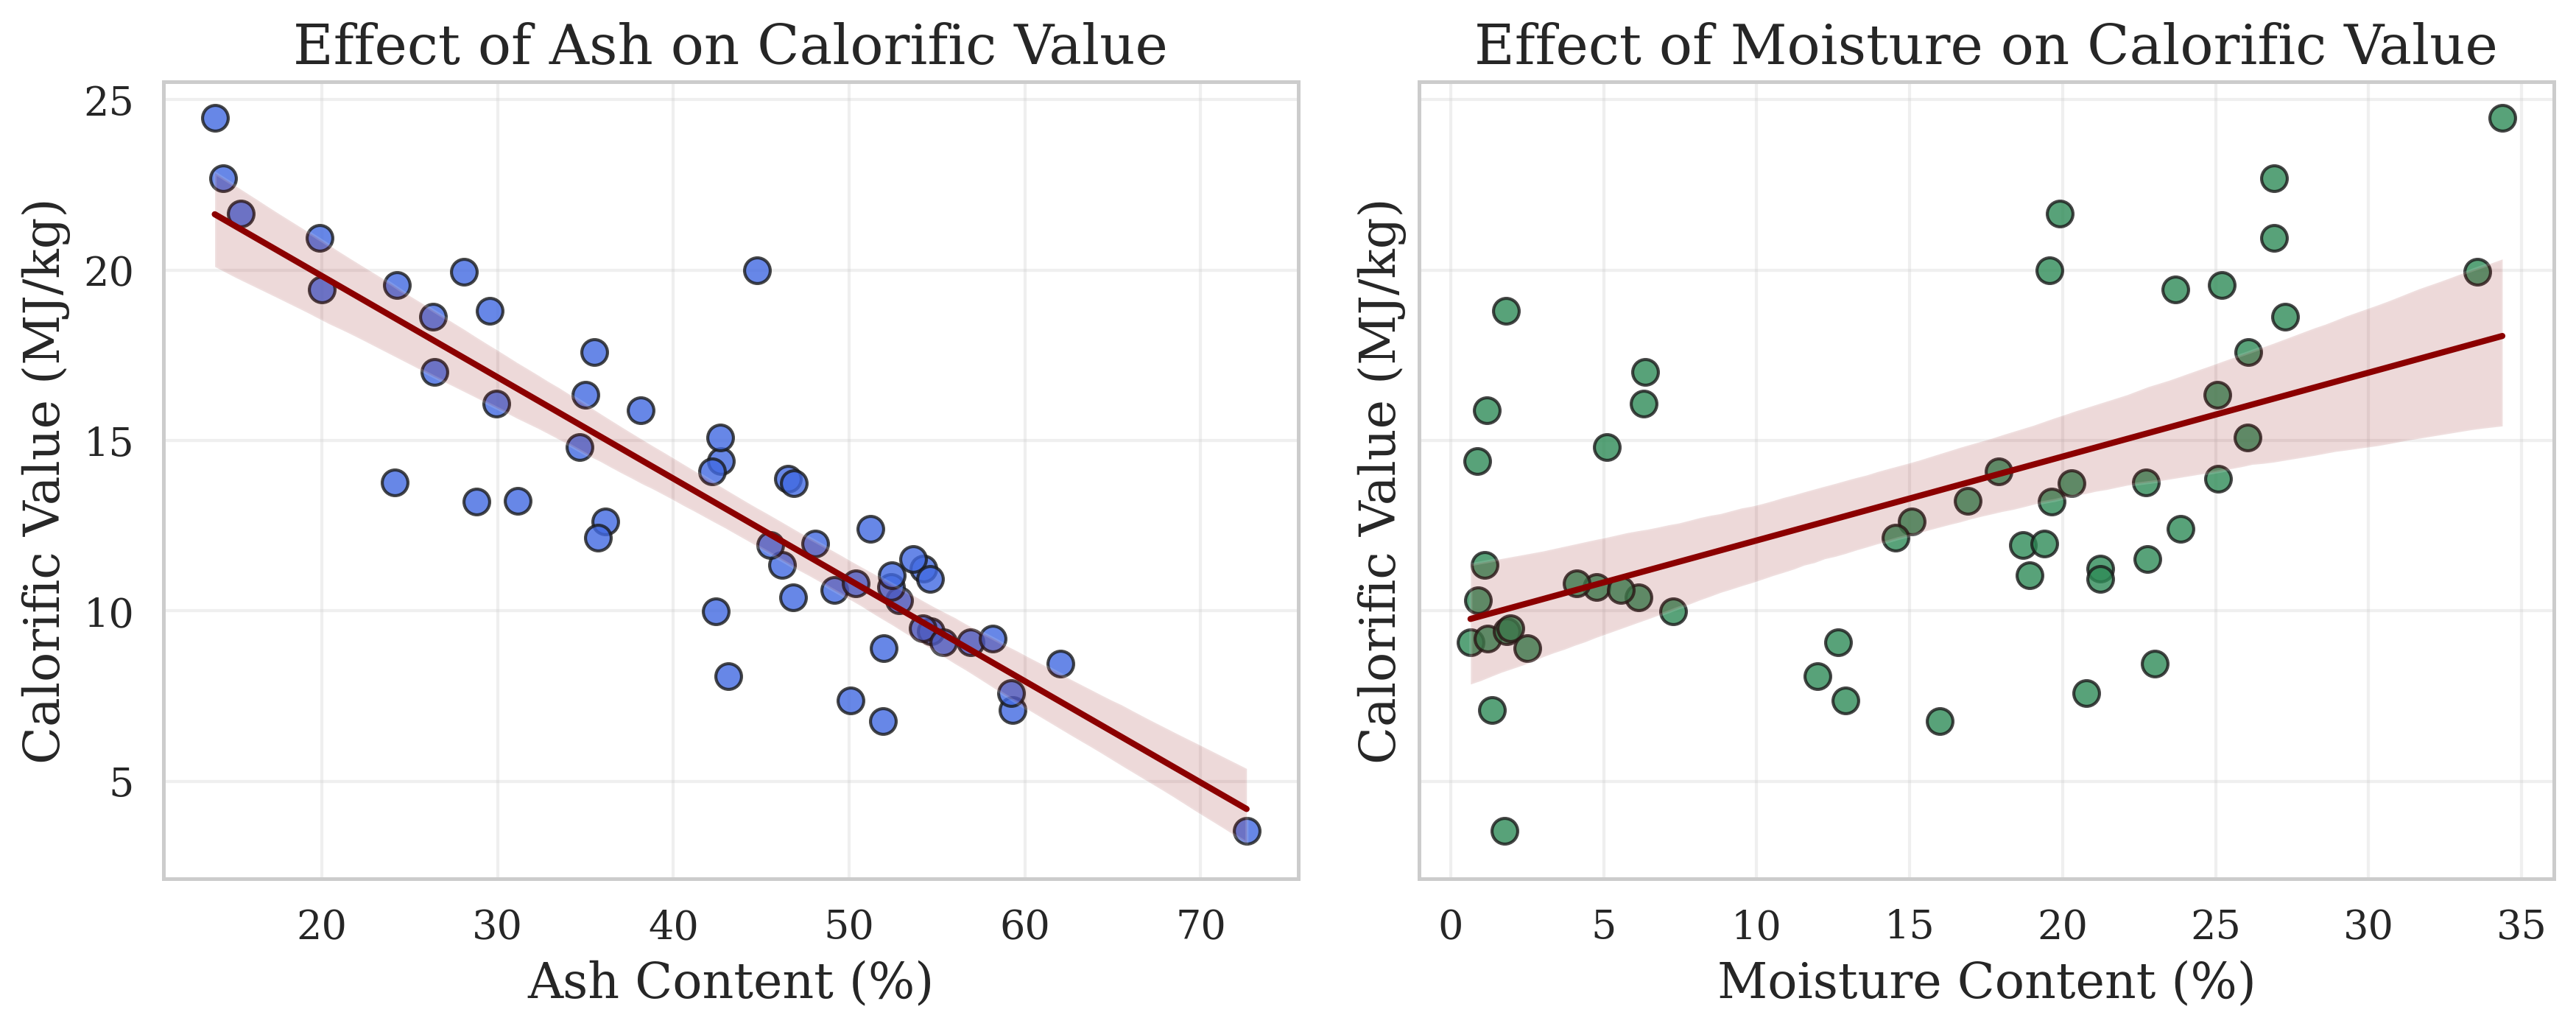

In [ ]:
# ============================================================
# Q1 Journal-Quality Graphs: Effect of Ash and Moisture on Calorific Value
# ============================================================

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. Load Dataset
# ------------------------------------------------------------
data = pd.read_csv("/content/for regression.csv")

# Print original column names to verify
print("Original column names:", data.columns)

# ------------------------------------------------------------
# 2. Configure Style for Q1 Journal Figure
# ------------------------------------------------------------
sns.set_theme(style="whitegrid", font_scale=1.5)
plt.rcParams.update({
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "axes.linewidth": 1.2,
    "figure.dpi": 300,
    "savefig.dpi": 600,
    "font.family": "serif"
})

# ------------------------------------------------------------
# 3. Create Side-by-Side Subplots
# ------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# --- Plot 1: Ash vs Calorific Value ---
sns.regplot(
    data=data,
    x="Ash_%", # Corrected column name
    y="Measured HCV (MJ/Kg)", # Corrected column name
    scatter_kws={"color": "royalblue", "alpha": 0.8, "s": 70, "edgecolor": "k"},
    line_kws={"color": "darkred", "lw": 2},
    ax=axes[0]
)
axes[0].set_title("Effect of Ash on Calorific Value")
axes[0].set_xlabel("Ash Content (%)")
axes[0].set_ylabel("Calorific Value (MJ/kg)") # Corrected label
axes[0].grid(True, alpha=0.3)

# --- Plot 2: Moisture vs Calorific Value ---
sns.regplot(
    data=data,
    x="Moisture _%", # Corrected column name
    y="Measured HCV (MJ/Kg)", # Corrected column name
    scatter_kws={"color": "seagreen", "alpha": 0.8, "s": 70, "edgecolor": "k"},
    line_kws={"color": "darkred", "lw": 2},
    ax=axes[1]
)
axes[1].set_title("Effect of Moisture on Calorific Value")
axes[1].set_xlabel("Moisture Content (%)")
axes[1].set_ylabel("Calorific Value (MJ/kg)") # Added label for consistency

axes[1].grid(True, alpha=0.3)

# ------------------------------------------------------------
# 4. Final Touches
# ------------------------------------------------------------
plt.tight_layout()
plt.savefig("TolayCoal_Ash_Moisture_vs_CalorificValue_Q1.png", bbox_inches="tight")
plt.show()